# Project Title: DNA Analysis with Next-Generation Sequencing (NGS): Integrating Genomics and Machine Learning

## Project Overview:
This project delves into the dynamic intersection of bioinformatics and machine learning, focusing on the analysis of genomic data derived from Next-Generation Sequencing (NGS) technologies. Utilizing a dataset comprising 100 DNA sequences, each meticulously crafted with 57 nucleotides, we aim to investigate the efficacy of various machine learning algorithms in classifying these sequences as either promoter or non-promoter regions within gene structures.

Our primary objective is to develop robust and accurate predictive models capable of effectively forecasting the functional roles of these DNA sequences. By leveraging state-of-the-art machine learning techniques, we aspire to enhance our understanding of genetic composition and its implications in biological processes.

Through this project, we not only seek to showcase the potential of machine learning in genomic classification but also foster collaboration opportunities to advance life sciences by integrating bioinformatics with cutting-edge computational methodologies.

#### Importing Libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


#### Importing Datasets from ICU Molecular Biology (Promoter Gene Sequences) Data Set


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"
names = ["Class", "id", "Sequence"]
data = pd.read_csv(url, names=names)

# View the first few rows
data.head()


,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


#### Exploring the Data

In [3]:
# Separate the 'Class' column
classes = data["Class"]
print(classes.value_counts())  # View counts of each class


Class
+    53
-    53
Name: count, dtype: int64


#### A promoter is a sequence of DNA needed to turn a gene on or off.
The process of transcription is initiated at the promoter. Usually found the beginning of a gene, the promoter has a binding site for the enzyme used to make a messenger RNA (mRNA) molecule.


According to this dataset:

- "+" means the promoters
- "-" means is anything that is not promoters.

#### Generating a DNA sequence¶
Data preparation
A nucleotide is the basic building block of nucleic acids.

RNA and DNA are polmyers made of long chains of nucleotides.

A nucleotide consists of a sugar molecule (either ribose in RNA or deoxyriboe in DNA) attached to a phosphate group and a nitrogen-containing base.

The bases in DNA are adenine (A), cytosine (C), guanine (G), and thymine (T). In RNA, the base uracil (U) takes the place of thymine.

Sequencing DNA means determining the order of the four chemical building blocks - called "bases" - that make up the DNA molecule. The sequence tells scientists the kind of genetic information that is carried in a particular DNA segment.

In [4]:
# Generate a list of DNA sequences
sequences = list(data["Sequence"])
dataset = {}

# Loop through sequences and split into individual nucleotides
for i, seq in enumerate(sequences):
    # Split into nucleotides, remove tab characters
    nucleotides = list(seq.replace('\t', ''))
    nucleotides.append(classes[i])  # Append class assignment
    dataset[i] = nucleotides

# Convert the dataset dictionary into a DataFrame
dframe = pd.DataFrame(dataset)
dframe.iloc[:5]

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


#### Data Transposition and Preview

In [5]:
# Transpose the DataFrame to have sequences as rows
df = dframe.transpose()

df.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


#### Encoding Classes and Features

In [6]:
# Encode the classes (target variable)
df[57] = df[57].apply(lambda x: 1 if x == '+' else 0)  # Encode '+' as 1, '-' as 0

# Encode the nucleotide features
nucleotide_map = {'a': 1, 'c': 2, 'g': 3, 't': 4}
for col in df.columns[:-1]:  # Apply encoding to all columns except the last (target)
    df[col] = df[col].map(nucleotide_map)

df.head()


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,4,1,2,4,1,3,2,1,1,4,...,3,2,4,4,3,4,2,3,4,1
1,4,3,2,4,1,4,2,2,4,3,...,2,1,4,2,3,2,2,1,1,1
2,3,4,1,2,4,1,3,1,3,1,...,2,1,2,2,2,3,3,2,3,1
3,1,1,4,4,3,4,3,1,4,3,...,1,1,2,1,1,1,2,4,2,1
4,4,2,3,1,4,1,1,4,4,1,...,2,2,3,4,3,3,4,1,3,1


#### Splitting the Dataset into Train and Test Sets

In [7]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.iloc[:, :-1]  # All columns except the last
y = df[57]           # Last column is the target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### Training Classification Models

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{model_name} Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.84
Random Forest Accuracy: 0.91
Support Vector Machine Accuracy: 0.84


#### Plotting Model Comparison

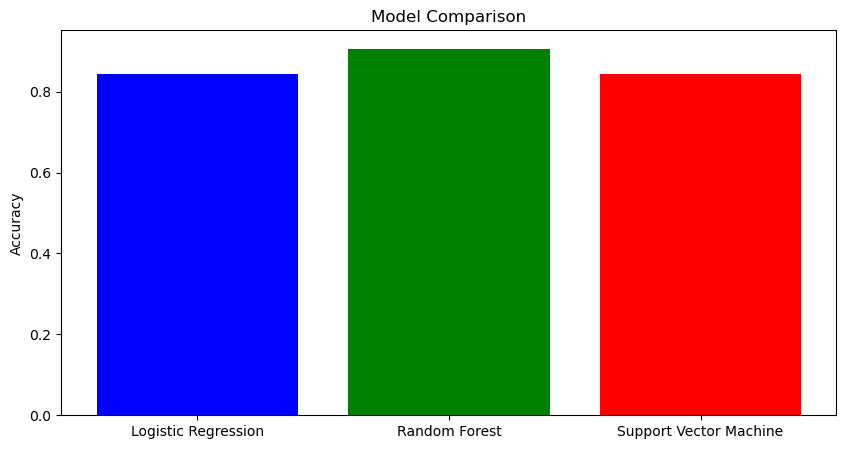

In [9]:
# Collect accuracy scores
accuracy_scores = {model_name: accuracy_score(y_test, model.predict(X_test)) for model_name, model in models.items()}

# Plot accuracies
plt.figure(figsize=(10, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


#### Model Selection and Serialization

In [10]:
import joblib

# Assuming Random Forest was the best performing
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(best_model, 'dna_classifier_model.pkl')
print("Model saved as dna_classifier_model.pkl")


Model saved as dna_classifier_model.pkl


#### Generating List of the Promoter And Non Promoter Sequence

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"
names = ["Class", "id", "Sequence"]
data = pd.read_csv(url, names=names)

# Extract promoter sequences (first 5)
promoter_sequences = data[data['Class'] == '+']['Sequence'].head(5).tolist()

# Extract non-promoter sequences (first 5)
non_promoter_sequences = data[data['Class'] == '-']['Sequence'].head(5).tolist()

# Display the results
print("Promoter Sequences (5 samples):")
for seq in promoter_sequences:
    print(seq)

print("\nNon-Promoter Sequences (5 samples):")
for seq in non_promoter_sequences:
    print(seq)

# Optionally, check the lengths of the extracted sequences
promoter_lengths = [len(seq) for seq in promoter_sequences]
non_promoter_lengths = [len(seq) for seq in non_promoter_sequences]

print(f"\nNumber of Promoter Sequences: {len(promoter_sequences)} (Lengths: {promoter_lengths})")
print(f"Number of Non-Promoter Sequences: {len(non_promoter_sequences)} (Lengths: {non_promoter_lengths})")


Promoter Sequences (5 samples):
		tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt
		tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaacgcatcgccaa
		gtactagagaactagtgcattagcttatttttttgttatcatgctaaccacccggcg
	aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaatactaacaaactc
	tcgataattaactattgacgaaaagctgaaaaccactagaatgcgcctccgtggtag

Non-Promoter Sequences (5 samples):
		atatgaacgttgagactgccgctgagttatcagctgtgaacgacattctggcgtcta
		cgaacgagtcaatcagaccgctttgactctggtattactgtgaacattattcgtctc
		caatggcctctaaacgggtcttgaggggttttttgctgaaaggaggaactatatgcg
		ttgacctactacgccagcattttggcggtgtaagctaaccattccggttgactcaat
		cgtctatcggtgaacctccggtatcaacgctggaaggtgacgctaacgcagatgcag

Number of Promoter Sequences: 5 (Lengths: [59, 59, 59, 58, 58])
Number of Non-Promoter Sequences: 5 (Lengths: [59, 59, 59, 59, 59])
